In [1]:
import os
from broad_qc import read_dataframes, calculate_metrics, format_metrics, plot_reads_vs_sampleID_reversed, extract_samples_from_files

In [2]:
metrics_path = '/gale/netapp/seq11/illumina_runs/qc_metrics/'
file = 'LP-PRSQRB495125_Broad_QC__SALK056_SALK057__227FH7LT4.csv'
pool_string = "SALK056_SALK057"

In [3]:
pool_strings = pool_string.split("_")
# Create the list of file paths using list comprehension
pool_files = [os.path.join(metrics_path, pool) for pool in pool_strings]
print(pool_files)
file_path = f'{metrics_path}/{file}'

['/gale/netapp/seq11/illumina_runs/qc_metrics/SALK056', '/gale/netapp/seq11/illumina_runs/qc_metrics/SALK057']


In [4]:
demux_stats, top_unknown_barcodes = read_dataframes(file_path)
metrics = calculate_metrics(demux_stats, top_unknown_barcodes)
formatted_metrics = format_metrics(metrics)

In [5]:
print("@card Broad sequencing QC metrics accepted")
for key, value in formatted_metrics.items():
        print(f"{key}: {value}")

@card Broad sequencing QC metrics accepted
run_yield: 8,511,789,376,224 Reads PF
run_yield_excluding_undetermined: 8,028,908,093,562 Reads PF
total_reads: 29,105,731,773 Reads PF
assumed_phiX_reads: 677,620,410 Reads PF
percent_phix_assumed: 2.33%
pool_with_fewest_reads_in_a_lane: UWA7648_CX2021_HTH1_1_P12-1-B6: 85,481,986


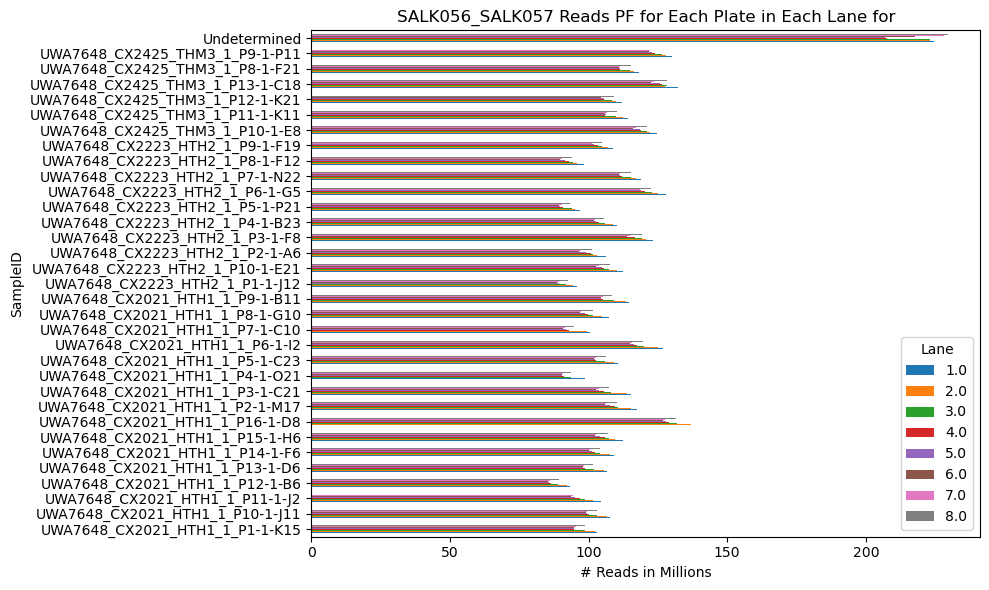

<Figure size 1000x600 with 0 Axes>

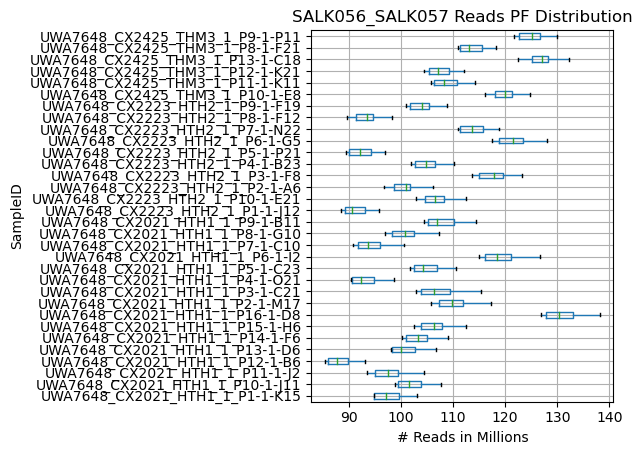

In [6]:
plot_reads_vs_sampleID_reversed(demux_stats, metrics_path ,pool_string)

In [10]:
pools = extract_samples_from_files(demux_stats, pool_files)

In [11]:
# Initialize an empty list to store formatted_metrics
all_formatted_metrics = []

for file_path, pool in pools.items():
    metrics = calculate_metrics(pool, top_unknown_barcodes)
    formatted_metrics = format_metrics(metrics)
    
    # Append the formatted_metrics dictionary to the list
    all_formatted_metrics.append(formatted_metrics)
    
    #print(f"run_yield: {formatted_metrics.get('run_yield')}")
    #print(f"pool_with_fewest_reads_in_a_lane: {formatted_metrics.get('pool_with_fewest_reads_in_a_lane')}")
        
    #plot_reads_vs_sampleID_reversed(pool, metrics_path , os.path.basename(file_path))

In [13]:
for pool, metrics in zip(pool_strings, all_formatted_metrics):
    print(f"{pool} pool_with_fewest_reads_in_a_lane: {metrics.get('pool_with_fewest_reads_in_a_lane')} Reads PF")

SALK056 pool_with_fewest_reads_in_a_lane: UWA7648_CX2021_HTH1_1_P12-1-B6: 85,481,986 Reads PF
SALK057 pool_with_fewest_reads_in_a_lane: UWA7648_CX2223_HTH2_1_P1-1-J12: 88,578,004 Reads PF


In [15]:
for pool, metrics in zip(pool_strings, all_formatted_metrics):
    print(f"{pool} total_reads: {metrics.get('total_reads')}")

SALK056 total_reads: 13,347,582,728 Reads PF
SALK057 total_reads: 13,997,675,495 Reads PF
